# Intro

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
# import xlsxwriter
import matplotlib.pyplot as plt
import numpy as np
import numpy
from scipy.optimize import curve_fit
import math
import random
import torch.optim as optim
import time
import torch.nn as nn

from torchvision.models.feature_extraction import create_feature_extractor


# Functions

## LogNormal

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
AlexNet_logNormal=torch.load('/content/drive/MyDrive/ressub.pth')

In [ ]:
state_dict = AlexNet_logNormal['state_dict']

In [ ]:
state_dict.keys()

odict_keys(['conv1.weight', 'conv1.scores', 'bn1.running_mean', 'bn1.running_var', 'bn1.num_batches_tracked', 'layer1.0.conv1.weight', 'layer1.0.conv1.scores', 'layer1.0.bn1.running_mean', 'layer1.0.bn1.running_var', 'layer1.0.bn1.num_batches_tracked', 'layer1.0.conv2.weight', 'layer1.0.conv2.scores', 'layer1.0.bn2.running_mean', 'layer1.0.bn2.running_var', 'layer1.0.bn2.num_batches_tracked', 'layer1.1.conv1.weight', 'layer1.1.conv1.scores', 'layer1.1.bn1.running_mean', 'layer1.1.bn1.running_var', 'layer1.1.bn1.num_batches_tracked', 'layer1.1.conv2.weight', 'layer1.1.conv2.scores', 'layer1.1.bn2.running_mean', 'layer1.1.bn2.running_var', 'layer1.1.bn2.num_batches_tracked', 'layer2.0.conv1.weight', 'layer2.0.conv1.scores', 'layer2.0.bn1.running_mean', 'layer2.0.bn1.running_var', 'layer2.0.bn1.num_batches_tracked', 'layer2.0.conv2.weight', 'layer2.0.conv2.scores', 'layer2.0.bn2.running_mean', 'layer2.0.bn2.running_var', 'layer2.0.bn2.num_batches_tracked', 'layer2.0.shortcut.0.weight', 'l

In [ ]:
dem={}
for i in state_dict:
  if i.endswith("scores"):
    dem[f"{i}.weight"]=state_dict[i].numpy()

In [ ]:
dem

{'conv1.scores.weight': array([[[[ 4.15540524e-02,  2.57816333e-02,  7.32690692e-02],
          [ 6.17485903e-02, -4.54038270e-02, -5.17768860e-02],
          [-2.01599784e-02, -3.96466404e-02,  1.13958865e-01]],
 
         [[-5.75761124e-02,  1.26567930e-02,  1.13155119e-01],
          [ 4.25048033e-03,  9.49114263e-02, -9.44648385e-02],
          [ 8.38095173e-02,  5.36588021e-03, -5.21474816e-02]],
 
         [[-7.74671789e-03,  1.79891109e-01, -1.51191326e-02],
          [ 1.53908178e-01,  3.60901430e-02, -9.83452126e-02],
          [-3.89844961e-02, -5.67593910e-02,  1.51084796e-01]]],
 
 
        [[[-3.08284182e-02,  4.13409919e-02,  1.12018637e-01],
          [-1.62245274e-01, -7.50699565e-02,  5.34187220e-02],
          [-1.17571555e-01,  8.18796828e-02,  6.54947886e-04]],
 
         [[-9.22776908e-02,  3.60207707e-02, -2.97614373e-03],
          [ 9.36093107e-02, -1.24402232e-01,  1.28205925e-01],
          [ 2.83689261e-03,  1.03543766e-01,  5.48082851e-02]],
 
         [[-1.

In [ ]:
# # array_4d = np.random.randn(64, 3, 7, 7)  # 64 samples, 3 channels, 7x7
# # Find the minimum and maximum values
# min_val = np.min(dem["conv1.weight"])
# max_val = np.max(dem["conv1.weight"])
# print(min_val,max_val)
# # max_val
# # Normalize the array to the range [0, 1]
# normalized_array = (dem["conv1.weight"] - min_val) / (max_val - min_val)

-0.27216554 0.27216554


In [ ]:
# normalized_array

array([[[[0., 1., 1.],
         [0., 0., 1.],
         [0., 1., 1.]],

        [[1., 1., 0.],
         [1., 0., 0.],
         [0., 0., 1.]],

        [[1., 0., 1.],
         [0., 1., 0.],
         [1., 1., 1.]]],


       [[[1., 0., 0.],
         [1., 1., 0.],
         [0., 1., 0.]],

        [[1., 1., 1.],
         [1., 0., 0.],
         [1., 0., 1.]],

        [[1., 0., 0.],
         [1., 0., 0.],
         [1., 1., 1.]]],


       [[[1., 1., 0.],
         [1., 0., 1.],
         [1., 1., 0.]],

        [[0., 1., 1.],
         [0., 1., 0.],
         [1., 0., 0.]],

        [[1., 1., 1.],
         [0., 1., 1.],
         [0., 0., 1.]]],


       ...,


       [[[0., 0., 0.],
         [1., 0., 1.],
         [1., 0., 0.]],

        [[1., 1., 0.],
         [0., 1., 1.],
         [1., 1., 1.]],

        [[0., 0., 1.],
         [1., 1., 0.],
         [0., 0., 0.]]],


       [[[0., 1., 1.],
         [1., 1., 1.],
         [0., 0., 0.]],

        [[1., 0., 1.],
         [0., 0., 1.],
         

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.optimize import curve_fit

def lognormal_like(x, a, mu, c):
    logx = [math.log(val) for val in x]
    return a * (1 / (2.5 * np.array(x) * c)) * np.exp(-((logx - mu) ** 2) / (2 * c ** 2))

def weight_ext1(state_dict):
    layer = 0
    layer1 = []
    maxi1 = []
    mini1 = []
    total_count = []
    A = []
    MU = []
    SIGMA = []
    R2 = []
    W = []
    y_ = []
    y_shape = []

    for key, param in state_dict.items():
        if key.endswith('.weight'):
            layer += 1
            print(f"Processing layer {layer}: {key}")
            weight = param.flatten()
            # print(len(weight))
            y_shape.append(weight.shape)
            print(len(set(weight)))
            maxi = max(weight)
            mini = min(weight)
            mini1.append(int(mini * 1000) / 1000)
            maxi1.append(int(maxi * 1000) / 1000)

            # mini1.append(mini)
            # maxi1.append(maxi)

            #print(maxi1)
            weight = np.abs(weight)
            W.append(sum(weight))
            total_count.append(len(weight))

            weight_ass = np.sort(weight)
            weight_ass = weight_ass / max(weight_ass)
            weight_ass = (weight_ass * 1000).astype(int) / 1000


            # print(weight_ass)
            prev = weight_ass[0]
            cnt = []
            weight_bin = []
            log_norm = []

            count = 1
            for i in range(1, len(weight_ass)):
                if weight_ass[i] <= prev:
                    count += 1
                else:
                    cnt.append(count)
                    prev = weight_ass[i]
                    weight_bin.append(prev)
                    log_norm.append(prev * count)
                    count = 1

            count_percent = 100 * np.array(cnt) / sum(cnt)
            cum_count = np.cumsum(cnt, dtype=float)
            # cum_count_percent = 100 * np.array(cum_count) / cum_count[-1]
            log_norm_percent = 100 * np.array(log_norm) / np.sum(log_norm)
            x_data = np.array(weight_bin)
            y_data = np.array(log_norm)

            try:
                popt, _ = curve_fit(lognormal_like, x_data, y_data, p0=(1, 0, 2))
                a_fit, mu, sigma = popt
                A.append(int(a_fit * 1000) / 1000)
                MU.append(int(mu * 1000) / 1000)
                SIGMA.append(int(sigma * 1000) / 1000)

                y_fit = lognormal_like(x_data, a_fit, mu, sigma)
                y_.append(popt)

                residuals = y_data - y_fit
                rss = np.sum(residuals ** 2)
                r_squared = 1 - (rss / np.sum((y_data - np.mean(y_data)) ** 2))
                R2.append(int(r_squared * 1000) / 1000)

                plt.scatter(x_data, y_data, label='Data')
                plt.plot(x_data, y_fit, 'r-', label='Fitted Curve')
                plt.xlabel('Normalized Weight')
                plt.ylabel('Category Weight')
                plt.title(f'Layer {layer}: R²={r_squared:.3f}')
                plt.show()

            except Exception as e:
                print(f'Curve fitting failed for layer {layer}: {str(e)}')
                plt.scatter(x_data, y_data, label='Data')
                plt.xlabel('Normalized Weight')
                plt.ylabel('Category Weight')
                plt.title(f'Layer {layer}: Data')
                plt.show()

    return y_, y_shape, maxi1

# Example usage with a state_dict
# state_dict = {'conv1.weight': np.random.randn(64, 3, 7, 7) }
# y_, y_shape, maxi1 = weight_ext1(state_dict)


Processing layer 1: conv1.scores.weight
1728


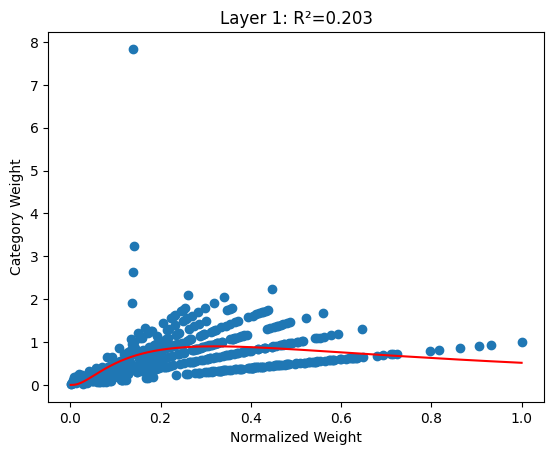

Processing layer 2: layer1.0.conv1.scores.weight
36850


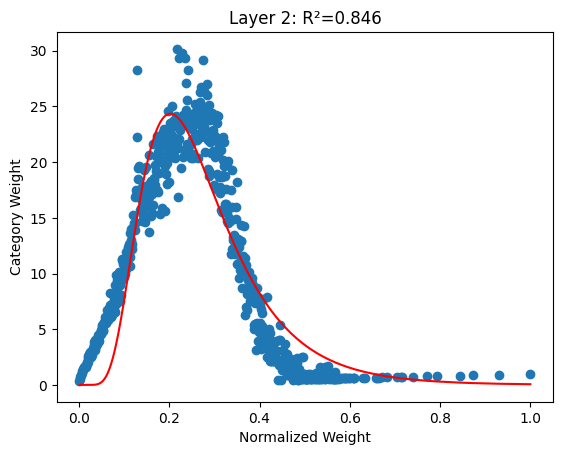

Processing layer 3: layer1.0.conv2.scores.weight
36851


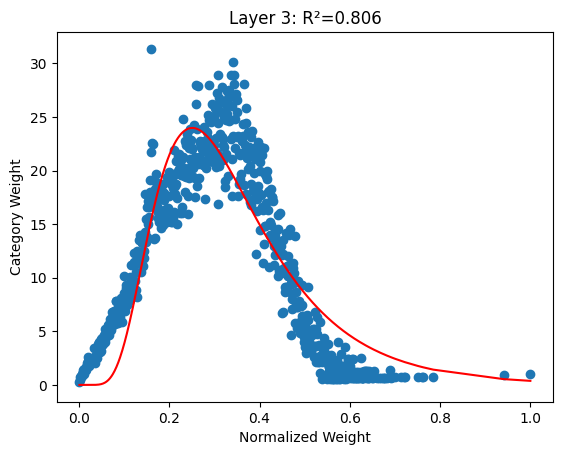

Processing layer 4: layer1.1.conv1.scores.weight
36852


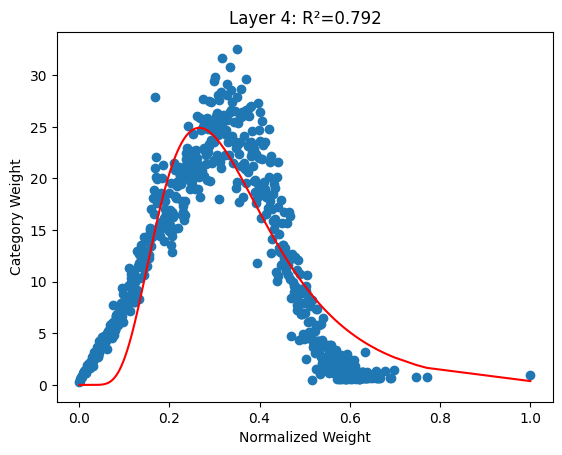

Processing layer 5: layer1.1.conv2.scores.weight
36849


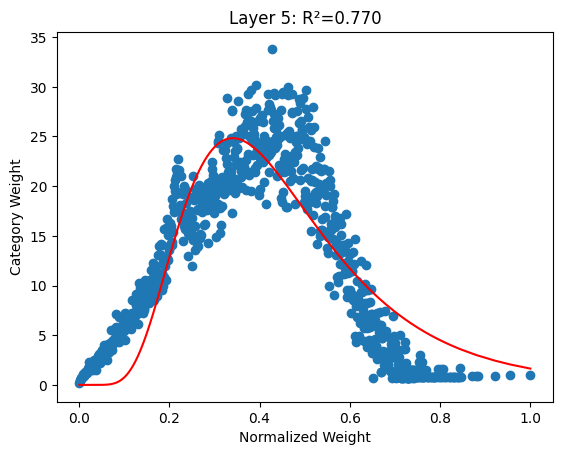

Processing layer 6: layer2.0.conv1.scores.weight
73674


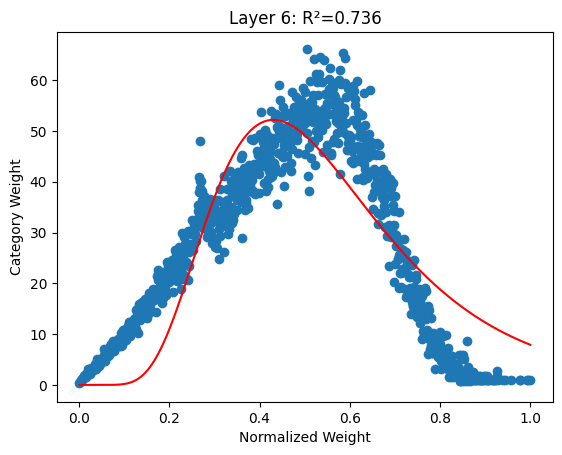

Processing layer 7: layer2.0.conv2.scores.weight
147267


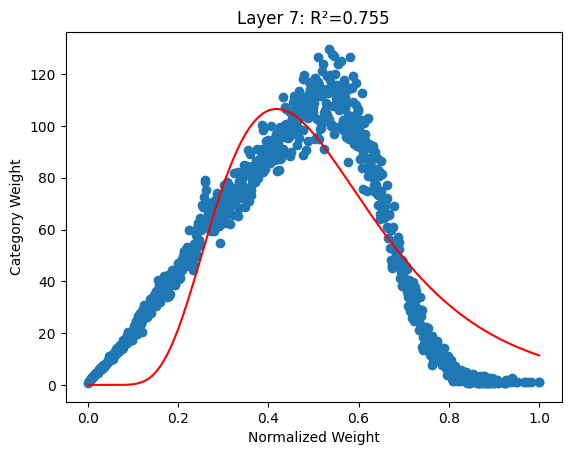

Processing layer 8: layer2.0.shortcut.0.scores.weight
8192


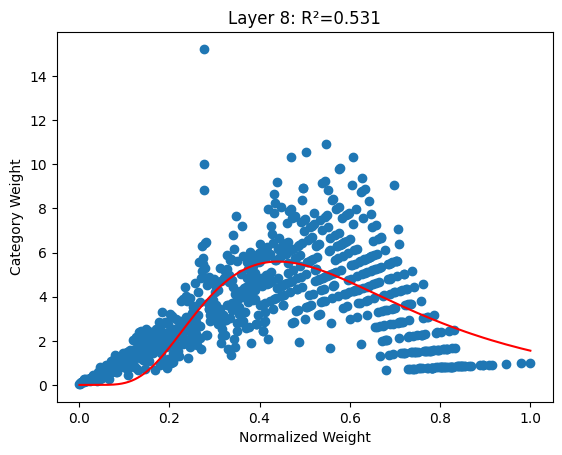

Processing layer 9: layer2.1.conv1.scores.weight
147255


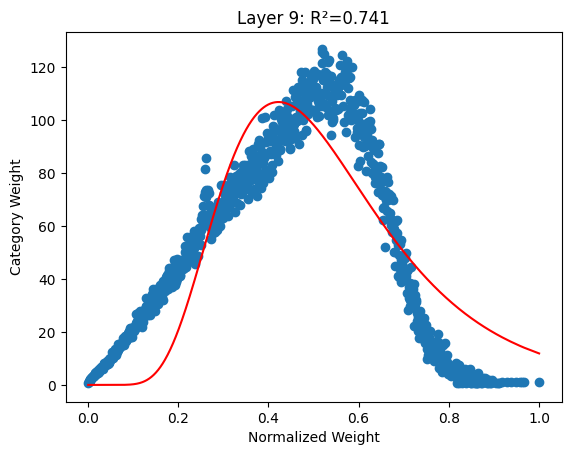

Processing layer 10: layer2.1.conv2.scores.weight
147261


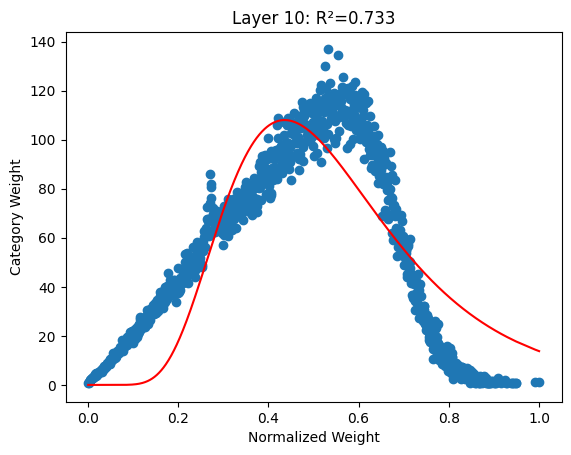

Processing layer 11: layer3.0.conv1.scores.weight
294097


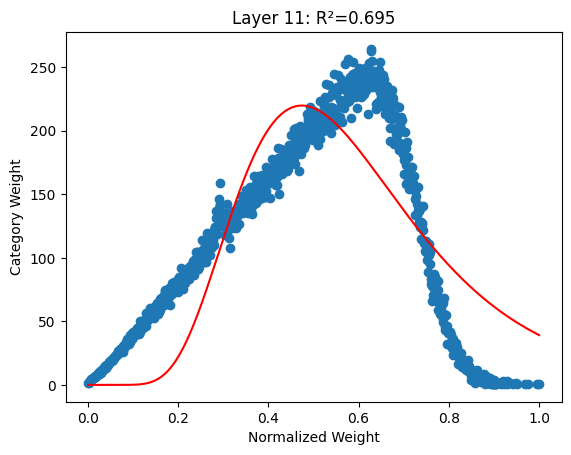

Processing layer 12: layer3.0.conv2.scores.weight
586431


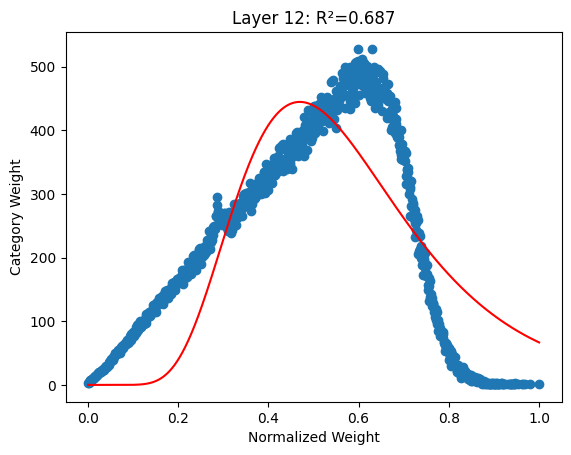

Processing layer 13: layer3.0.shortcut.0.scores.weight
32758


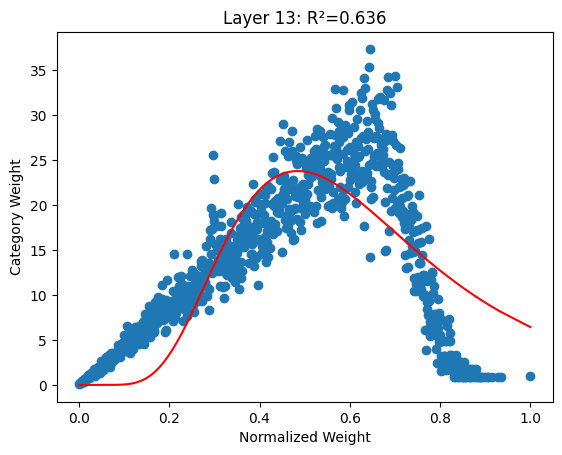

Processing layer 14: layer3.1.conv1.scores.weight
586417


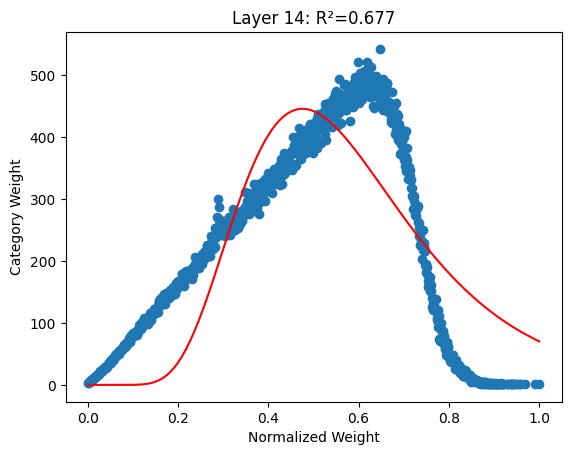

Processing layer 15: layer3.1.conv2.scores.weight
586415


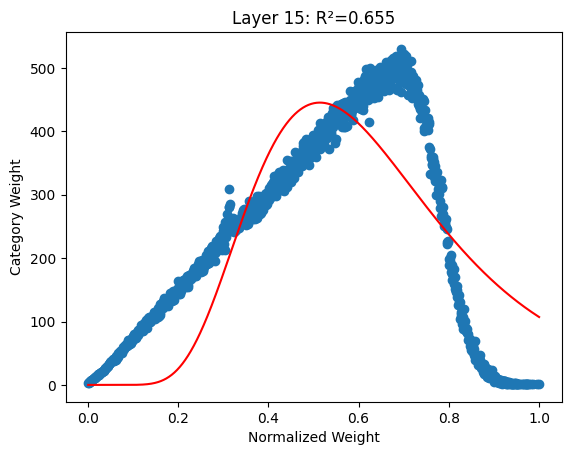

Processing layer 16: layer4.0.conv1.scores.weight
1165550


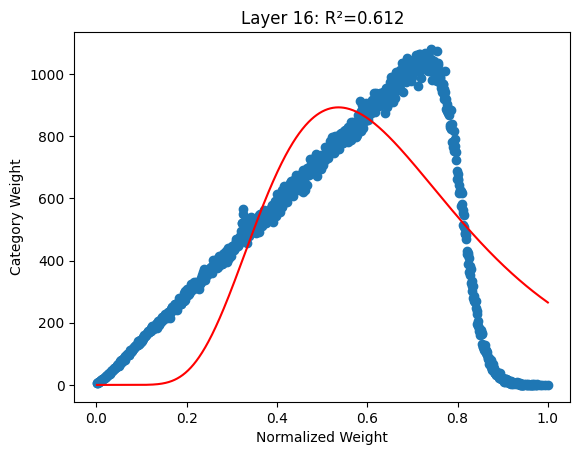

Processing layer 17: layer4.0.conv2.scores.weight
2304386


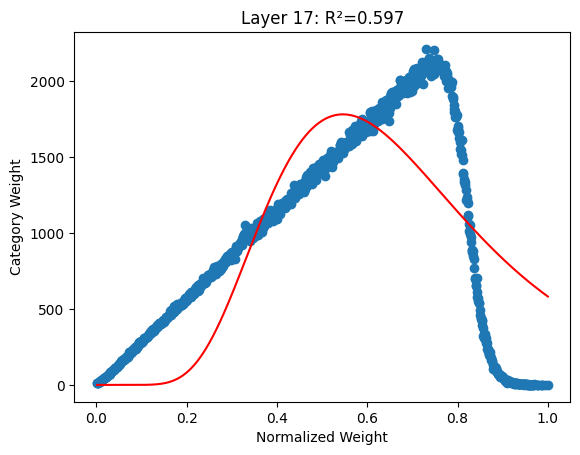

Processing layer 18: layer4.0.shortcut.0.scores.weight
130905


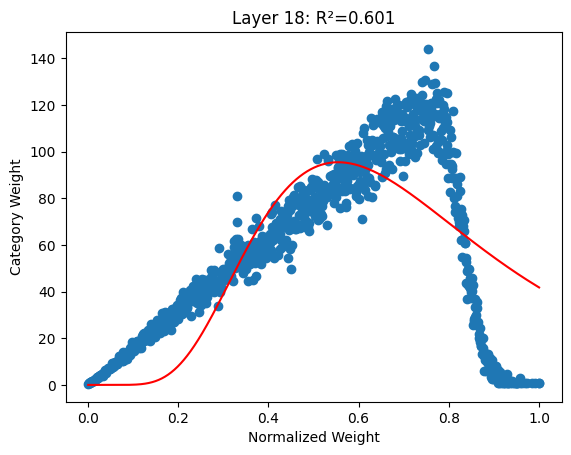

Processing layer 19: layer4.1.conv1.scores.weight
2304693


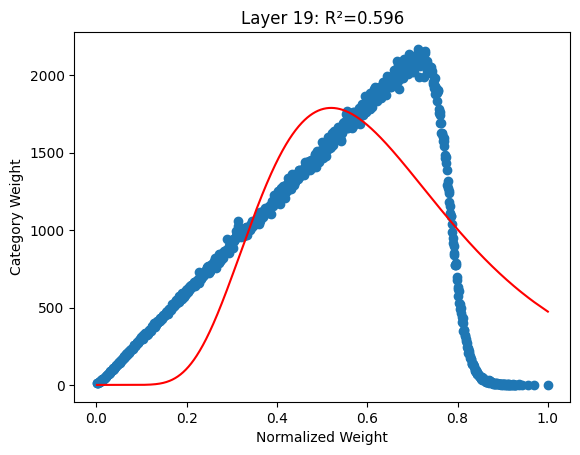

Processing layer 20: layer4.1.conv2.scores.weight
2304209


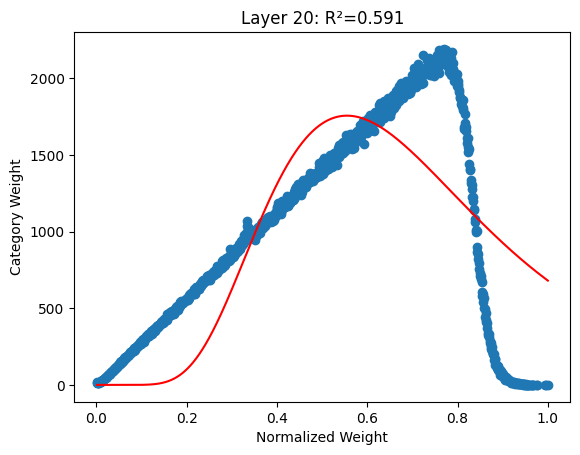

Processing layer 21: fc.scores.weight
5120


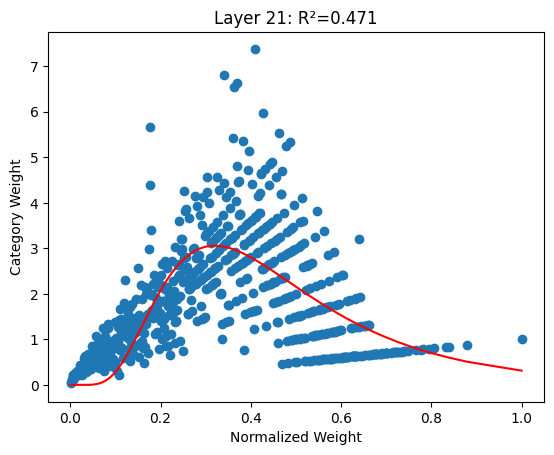

In [ ]:
# y_,y_shape,maxi=weight_ext1(state_dictt)
y_,y_shape,maxi=weight_ext1(dem)

In [ ]:
try2=torch.load('/content/drive/MyDrive/conv8_sub.pth')

In [ ]:
state_dict = try2['state_dict']

In [ ]:
state_dict.keys()

odict_keys(['convs.0.weight', 'convs.0.scores', 'convs.2.weight', 'convs.2.scores', 'convs.5.weight', 'convs.5.scores', 'convs.7.weight', 'convs.7.scores', 'convs.10.weight', 'convs.10.scores', 'convs.12.weight', 'convs.12.scores', 'convs.15.weight', 'convs.15.scores', 'convs.17.weight', 'convs.17.scores', 'linear.0.weight', 'linear.0.scores', 'linear.2.weight', 'linear.2.scores', 'linear.4.weight', 'linear.4.scores'])

In [ ]:
dem={}
a=0
for i in state_dict:
    dem[f"{i}.weight"]=state_dict[i].numpy()

In [ ]:
dem

{'convs.0.weight.weight': array([[[[ 0.27216554, -0.27216554, -0.27216554],
          [-0.27216554,  0.27216554, -0.27216554],
          [-0.27216554, -0.27216554,  0.27216554]],
 
         [[ 0.27216554,  0.27216554,  0.27216554],
          [ 0.27216554, -0.27216554, -0.27216554],
          [-0.27216554, -0.27216554,  0.27216554]],
 
         [[-0.27216554, -0.27216554,  0.27216554],
          [-0.27216554, -0.27216554,  0.27216554],
          [ 0.27216554, -0.27216554, -0.27216554]]],
 
 
        [[[ 0.27216554,  0.27216554,  0.27216554],
          [-0.27216554, -0.27216554, -0.27216554],
          [-0.27216554,  0.27216554,  0.27216554]],
 
         [[-0.27216554,  0.27216554,  0.27216554],
          [ 0.27216554, -0.27216554, -0.27216554],
          [-0.27216554,  0.27216554, -0.27216554]],
 
         [[ 0.27216554,  0.27216554,  0.27216554],
          [-0.27216554,  0.27216554, -0.27216554],
          [-0.27216554, -0.27216554, -0.27216554]]],
 
 
        [[[ 0.27216554, -0.272165

Processing layer 1: convs.0.weight.weight
2
Curve fitting failed for layer 1: `ydata` must not be empty!


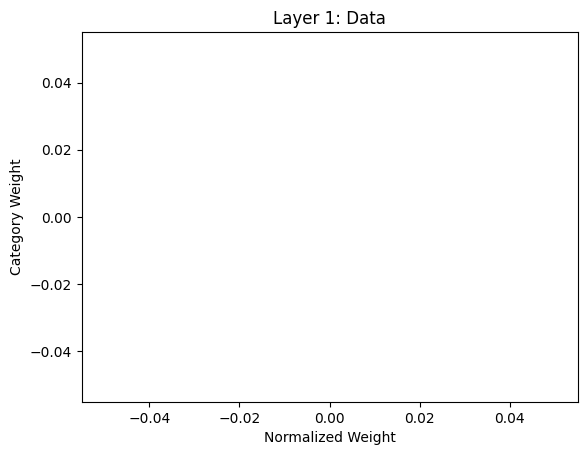

Processing layer 2: convs.0.scores.weight
1728


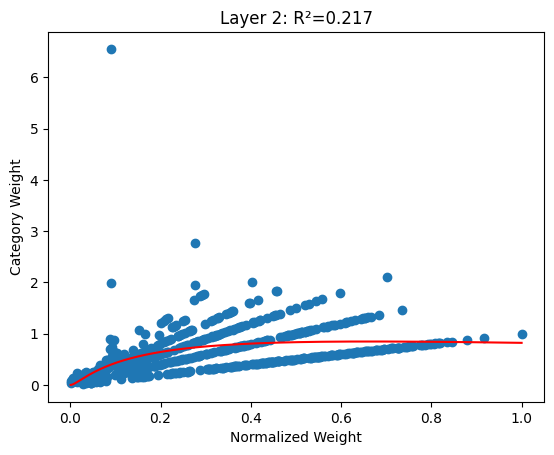

Processing layer 3: convs.2.weight.weight
2
Curve fitting failed for layer 3: `ydata` must not be empty!


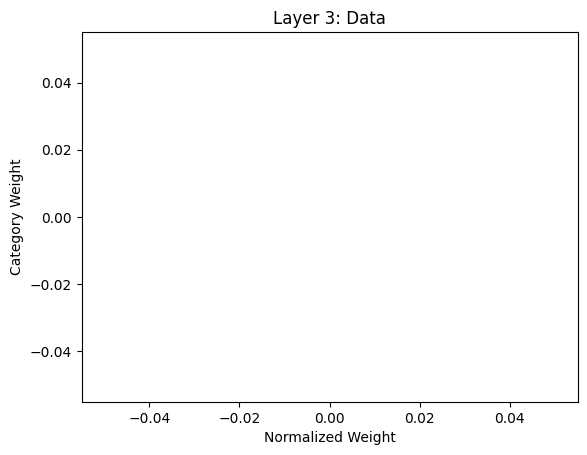

Processing layer 4: convs.2.scores.weight
36855


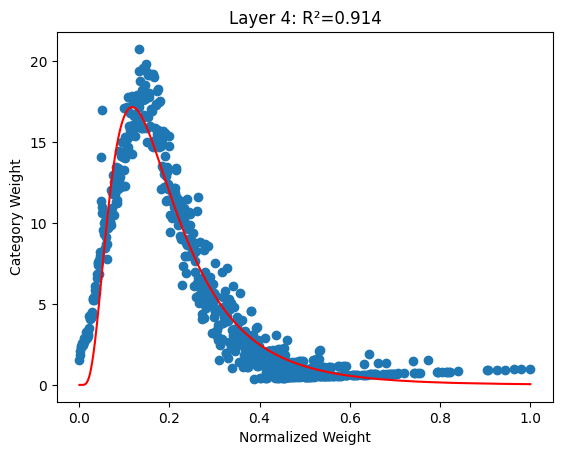

Processing layer 5: convs.5.weight.weight
2
Curve fitting failed for layer 5: `ydata` must not be empty!


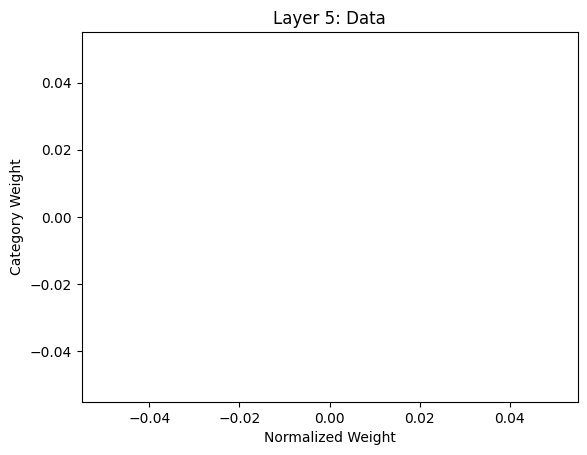

Processing layer 6: convs.5.scores.weight
73694


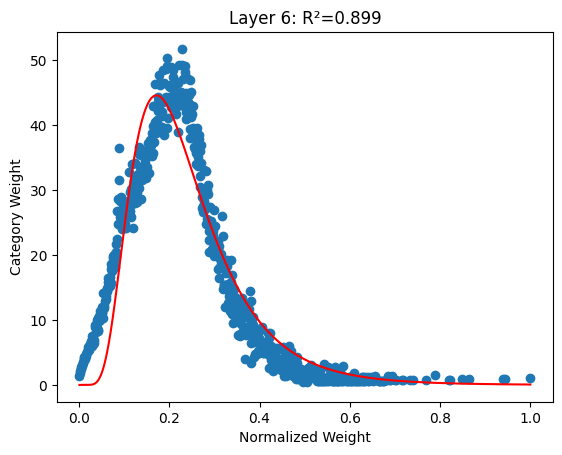

Processing layer 7: convs.7.weight.weight
2
Curve fitting failed for layer 7: `ydata` must not be empty!


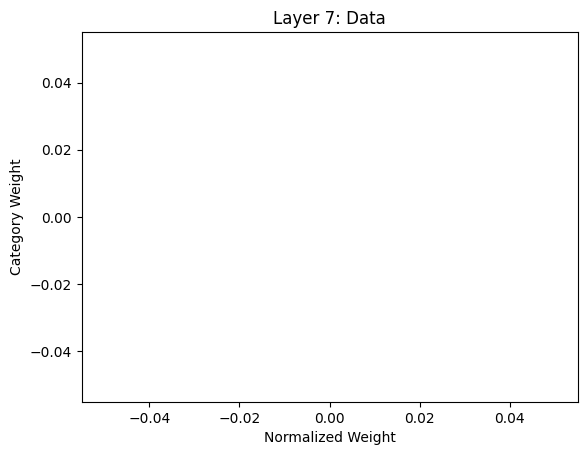

Processing layer 8: convs.7.scores.weight
147265


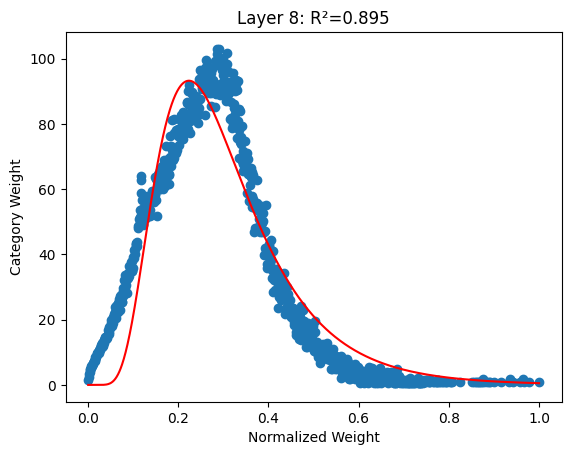

Processing layer 9: convs.10.weight.weight
2
Curve fitting failed for layer 9: `ydata` must not be empty!


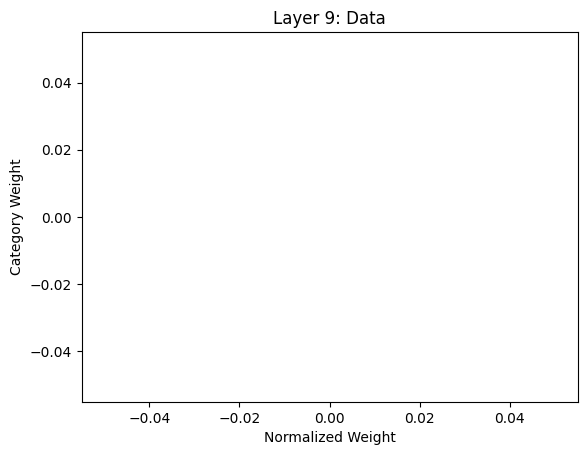

Processing layer 10: convs.10.scores.weight
294162


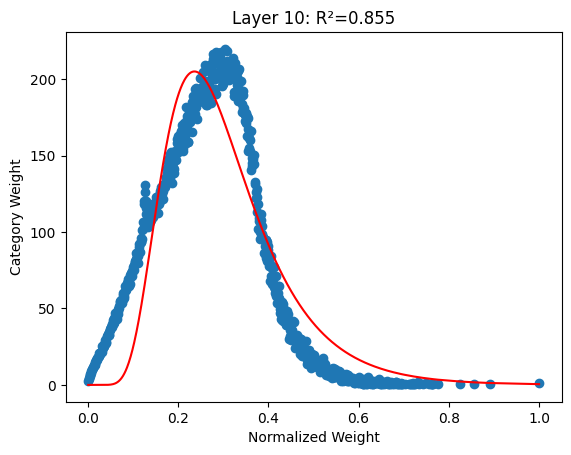

Processing layer 11: convs.12.weight.weight
2
Curve fitting failed for layer 11: `ydata` must not be empty!


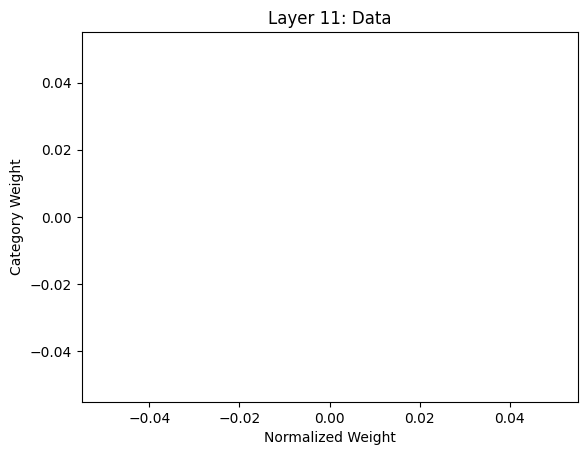

Processing layer 12: convs.12.scores.weight
586872


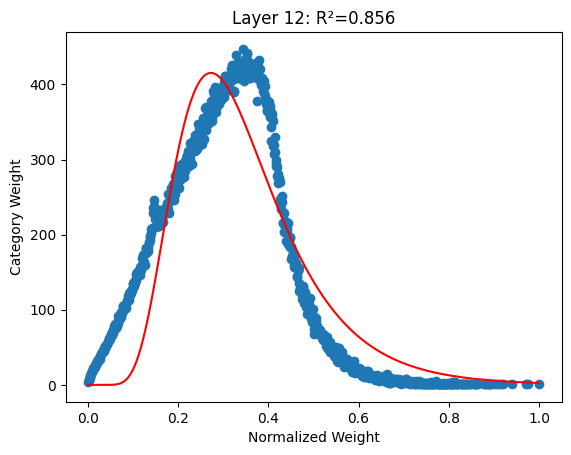

Processing layer 13: convs.15.weight.weight
2
Curve fitting failed for layer 13: `ydata` must not be empty!


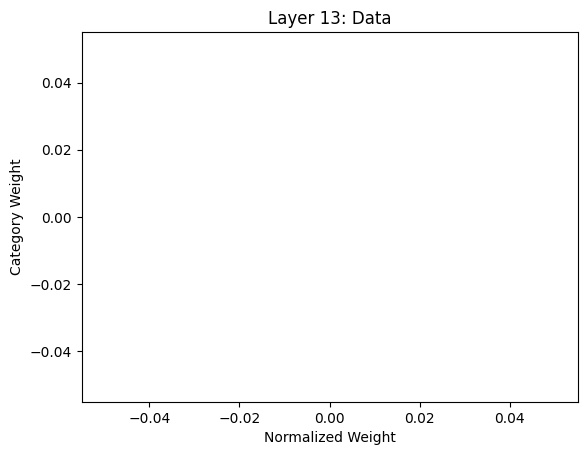

Processing layer 14: convs.15.scores.weight
1167155


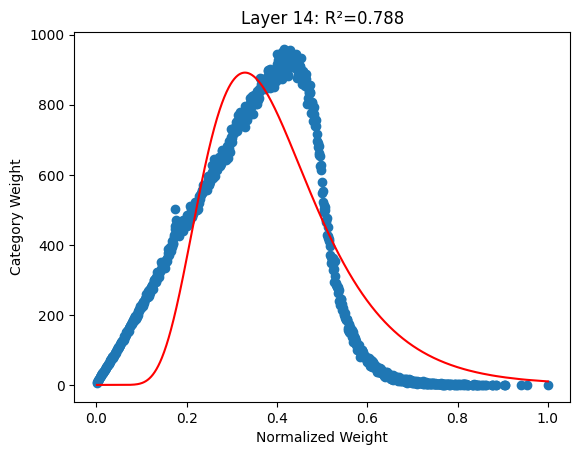

Processing layer 15: convs.17.weight.weight
2
Curve fitting failed for layer 15: `ydata` must not be empty!


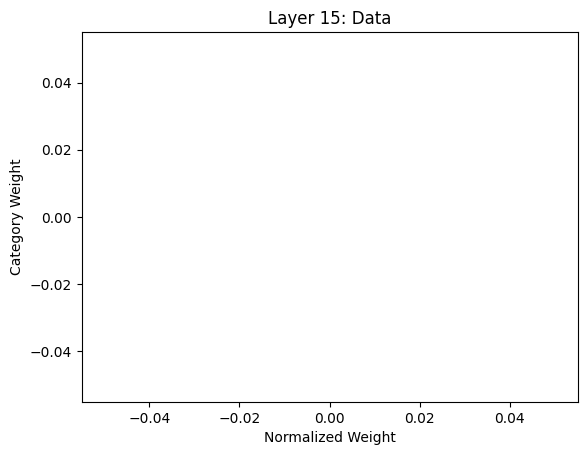

Processing layer 16: convs.17.scores.weight
2305580


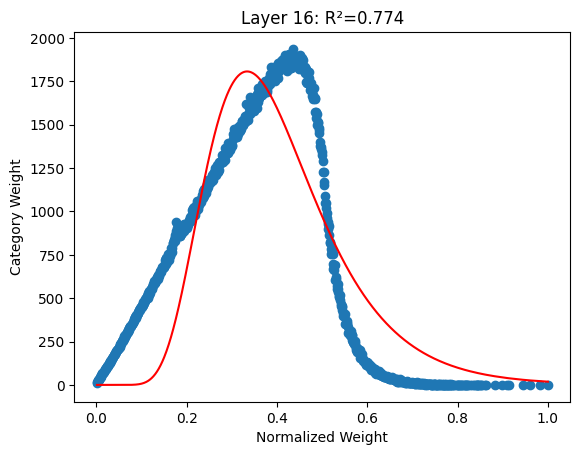

Processing layer 17: linear.0.weight.weight
2
Curve fitting failed for layer 17: `ydata` must not be empty!


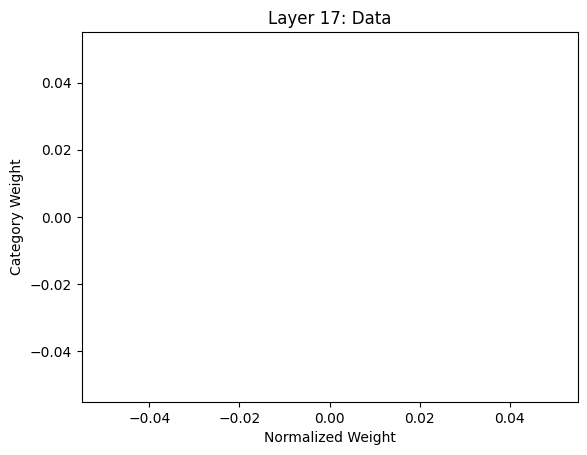

Processing layer 18: linear.0.scores.weight
521827


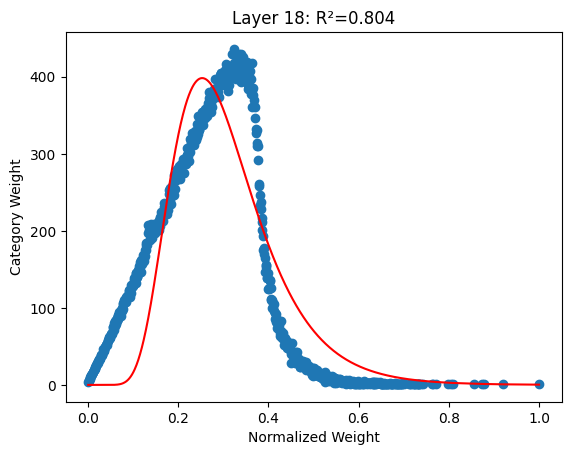

Processing layer 19: linear.2.weight.weight
2
Curve fitting failed for layer 19: `ydata` must not be empty!


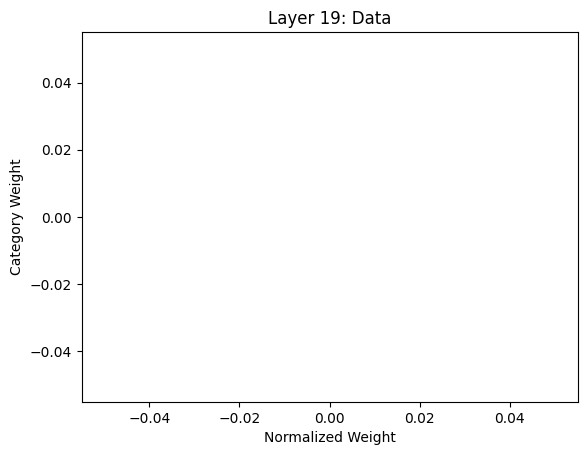

Processing layer 20: linear.2.scores.weight
65499


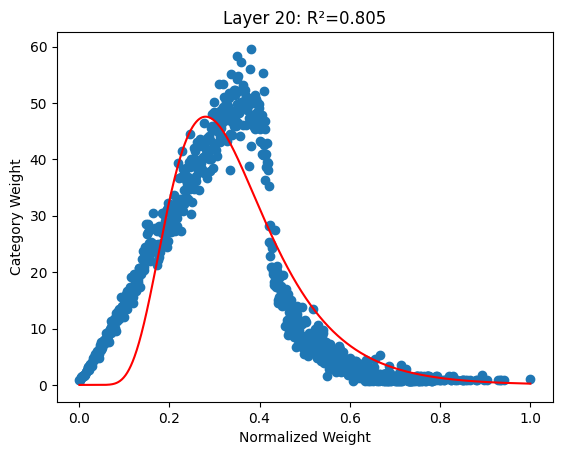

Processing layer 21: linear.4.weight.weight
2
Curve fitting failed for layer 21: `ydata` must not be empty!


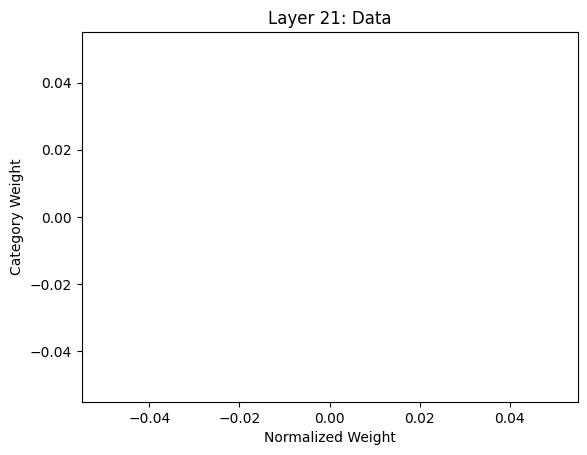

Processing layer 22: linear.4.scores.weight
2560


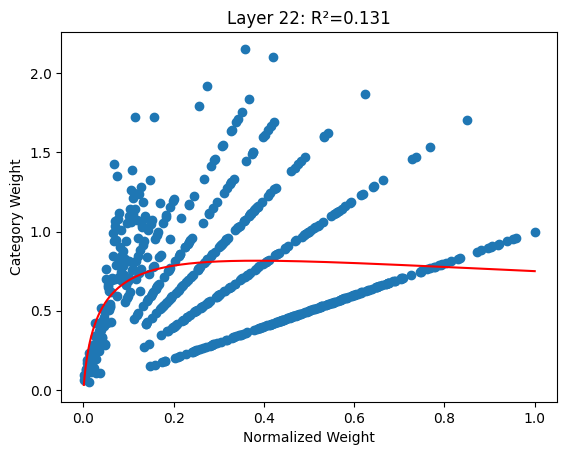

In [ ]:
y_,y_shape,maxi=weight_ext1(dem)

In [ ]:
try3=torch.load('/content/drive/MyDrive/mnist_cnn.pt')

In [ ]:
try3.keys()

odict_keys(['conv1.weight', 'conv1.scores', 'conv2.weight', 'conv2.scores', 'fc1.weight', 'fc1.scores', 'fc2.weight', 'fc2.scores'])

In [ ]:
dem={}
a=0
for i in try3:
    dem[f"{i}.weight"]=try3[i].numpy()

Processing layer 1: conv1.weight.weight
Curve fitting failed for layer 1: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


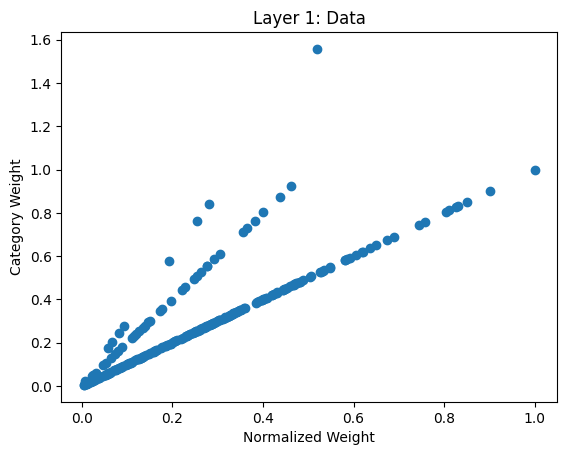

Processing layer 2: conv1.scores.weight
Curve fitting failed for layer 2: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


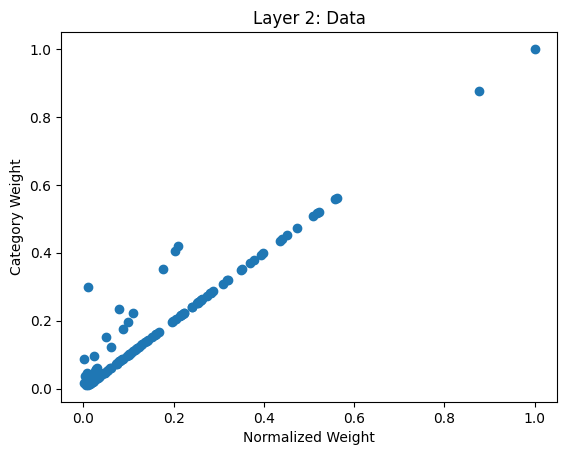

Processing layer 3: conv2.weight.weight


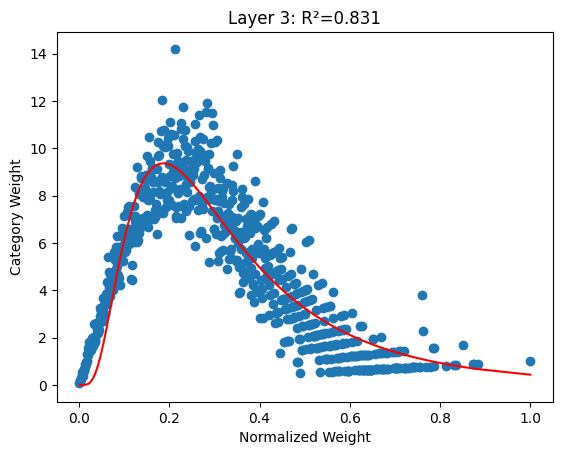

Processing layer 4: conv2.scores.weight


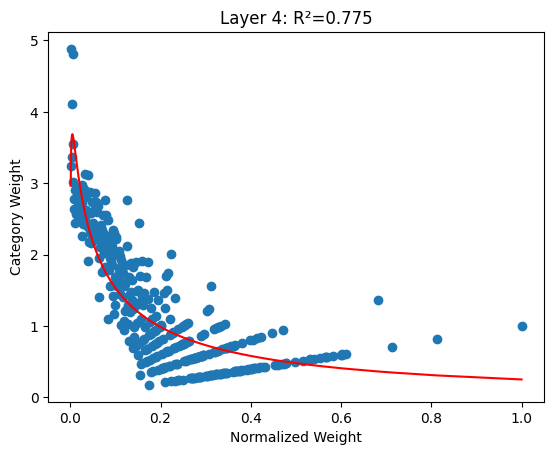

Processing layer 5: fc1.weight.weight


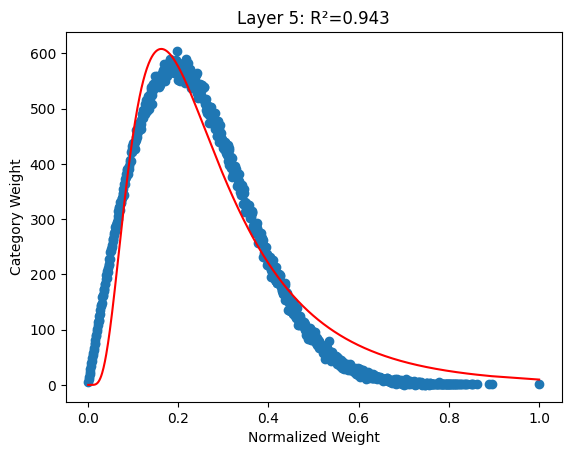

Processing layer 6: fc1.scores.weight


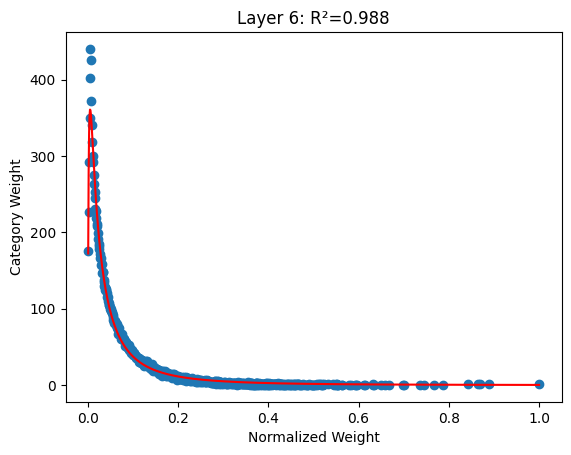

Processing layer 7: fc2.weight.weight


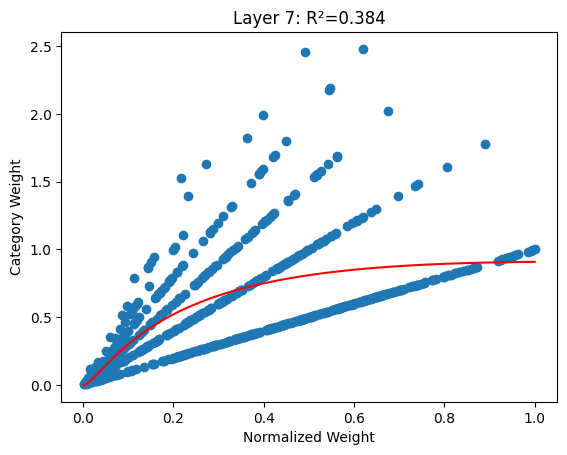

Processing layer 8: fc2.scores.weight
Curve fitting failed for layer 8: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


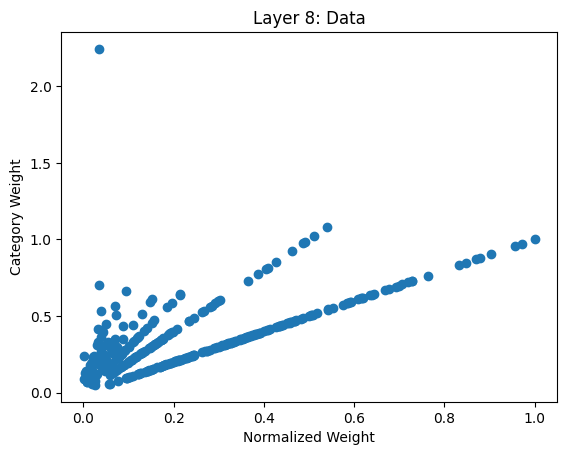

In [ ]:
y_,y_shape,maxi=weight_ext1(dem)

Processing layer 1: conv1.weight
9408


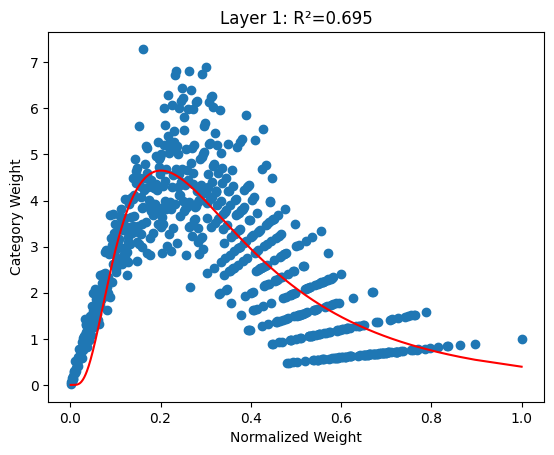

In [ ]:
# Example usage with a state_dict
state_dict = {'conv1.weight': np.random.randn(64, 3, 7, 7)}
y_, y_shape, maxi1 = weight_ext1(state_dict)

In [ ]:
try1 = {'conv2.weight': np.random.randn(64, 3, 7, 7)}

# Convert to Uniform Distribution in the range [a, b]
a = -1.0  # Lower bound
b = 1.0   # Upper bound
uniform_distribution = np.random.uniform(a, b, size=try1['conv2.weight'].shape)

In [ ]:
try2={'conv3.weight': uniform_distribution}


In [ ]:
# try1 = {'co1.weight': np.random.randn(64, 3, 7, 7)}
# try1 = {'conv1.weight': np.random.randn(64, 3, 7, 7)}

Processing layer 1: conv3.weight
9408
Curve fitting failed for layer 1: Optimal parameters not found: Number of calls to function has reached maxfev = 800.


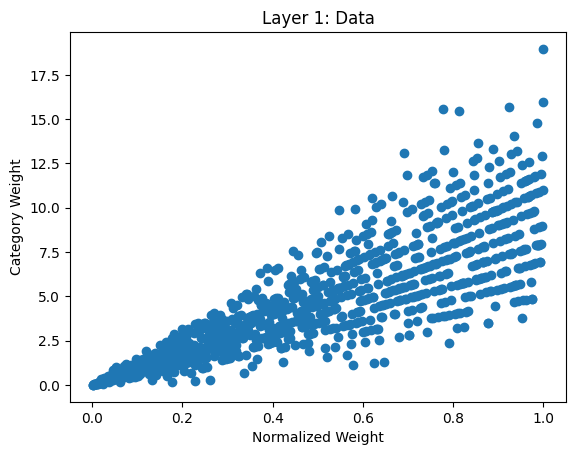

In [ ]:
y_, y_shape, maxi1 = weight_ext1(try2)

In [ ]:
mu = 0   # Desired mean
sigma = 1  # Desired standard deviation
normal_distribution = mu + sigma * np.random.randn(64, 3, 7, 7)

In [ ]:
try3={'conv4.weight': normal_distribution}

Processing layer 1: conv4.weight
9408


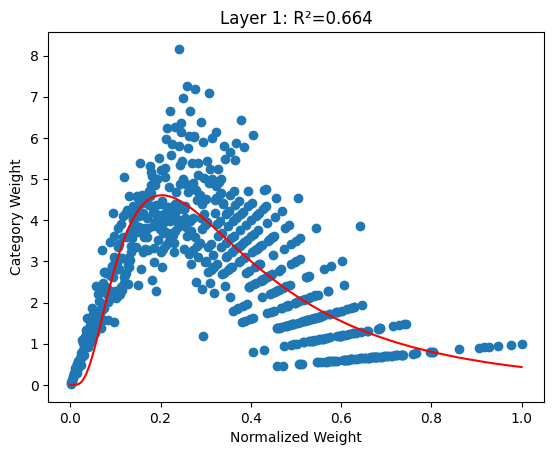

In [ ]:
y_, y_shape, maxi1 = weight_ext1(try3)